Assesment
Assignment 1: Submit a write-up on the following:
Hugging face agents

Hugging face pipeline for text generation

HF inference endpoints

Give feedback on the image generation and explore different models available on the Hugging Face website

Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine
Objective
In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
Generate captions for 15 different images.
Build a search engine for these images using a larger dataset of images.
Part 1: Generate Captions for Images
Part 2: Build an Image Search Engine
Submission
Submit the following as a Streamlit app:

Your Python code for generating captions and building the search engine.
A report describing your approach, challenges faced, and how you overcame them.
Screenshots of the interface and results.
Evaluation Criteria

Correctness and efficiency of the code.
Clarity and completeness of the report.
Usability and functionality of the search engine interface.
Please don't use any Generative AI Models
some hugging face agents are: 1- Code agent, This agent has a planning step, then generates python code to execute all its actions at once.

2- React agents, This is the agent that solves reasoning tasks.

Hugging face pipeline for text generation: strart with data cleaning like Removing special characters and Convert it to lowercase, after that toknizing the text and Removing stopwords.

HF inference endpoints:

help securly deploy any Hugging Face Transformers, Sentence-Transformers and models.

Give feedback on the image generation and explore different models available on the Hugging Face website:

hugging face has plenty of image generation models. there are two models that i found enteristing 1- AuraFlow v0.2: is a fully open-sourced largest flow-based text-to-image generation it can generate images based on the text you provide to it.

2- PhotoMaker V2: this model takes as an input one or a few face photos along with a text prompt to receive a customized photo or painting within seconds.

Part 1: Generate Captions for Images:

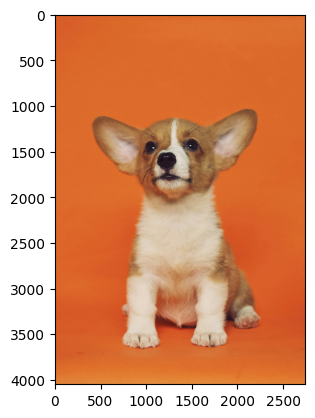

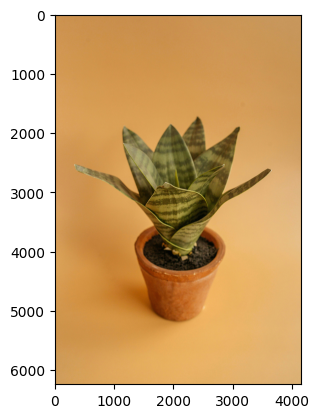

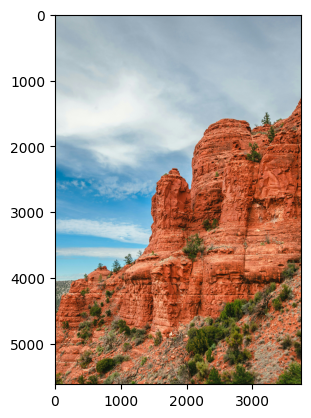

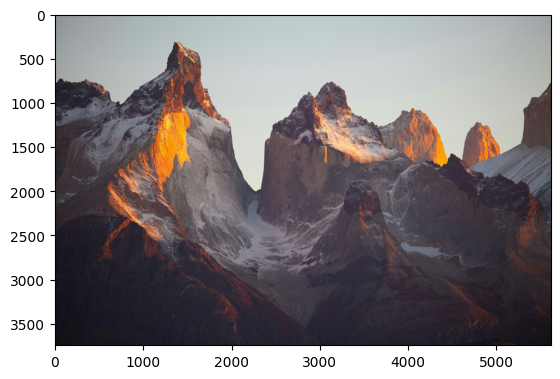

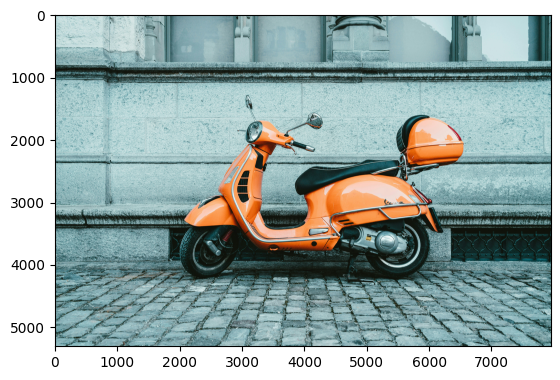

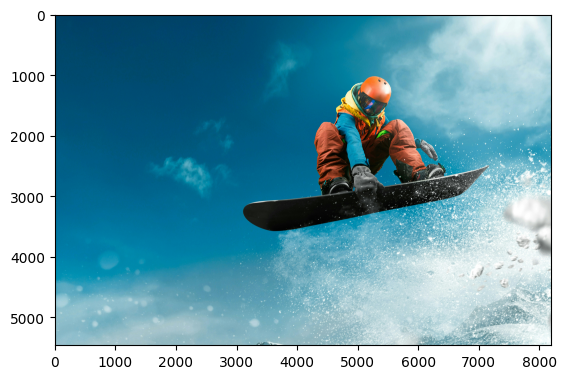

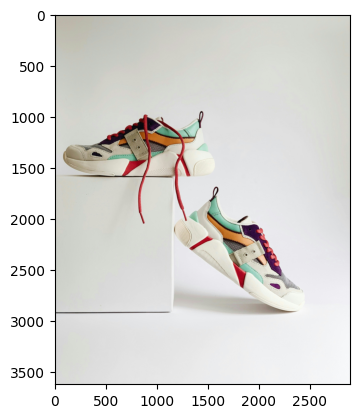

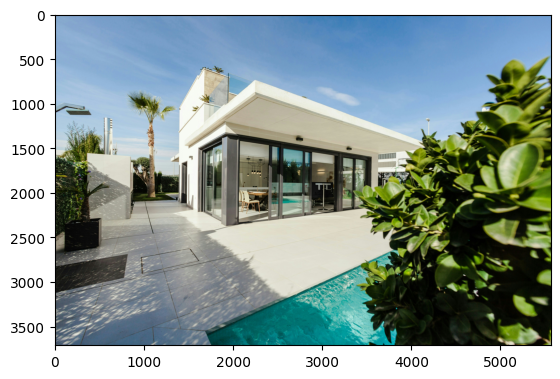

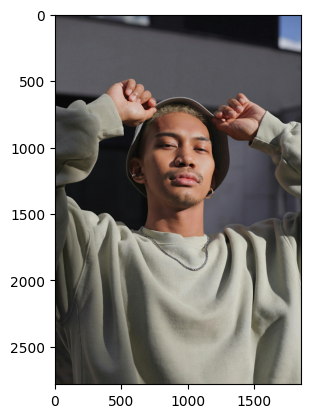

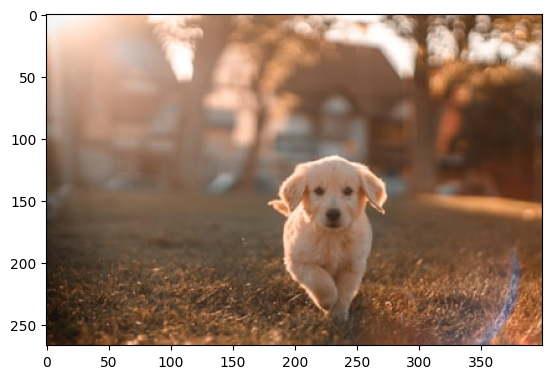

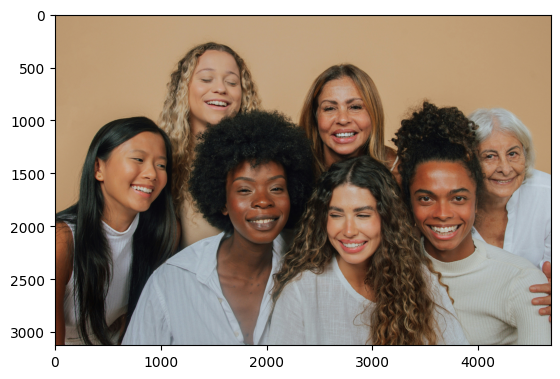

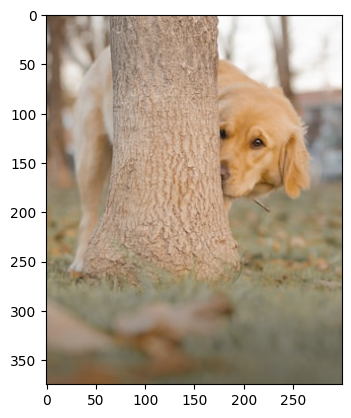

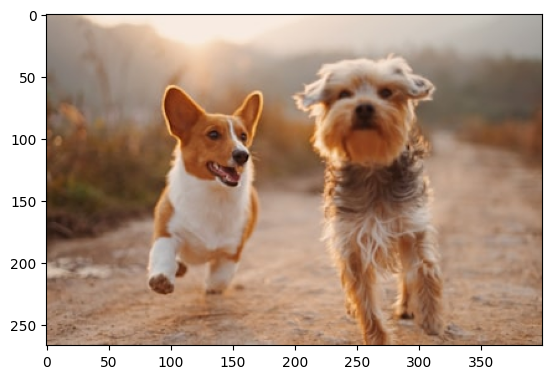

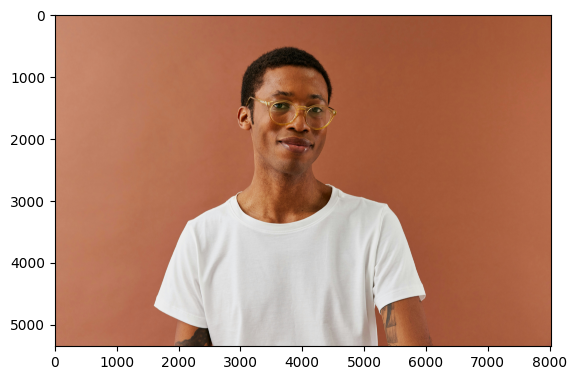

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://demo-source.imgix.net/puppy.jpg",
    "https://demo-source.imgix.net/plant.jpg",
    "https://demo-source.imgix.net/canyon.jpg",
    "https://demo-source.imgix.net/mountains.jpg",
    "https://demo-source.imgix.net/scooter.jpg",
    "https://demo-source.imgix.net/snowboard.jpg",
    "https://demo-source.imgix.net/sneakers.jpg",
    "https://demo-source.imgix.net/house.jpg?__hstc=158051173.2ebbba897fdcd31ad68c9f096d5ff139.1722525800774.1722525800774.1722525800774.1&__hssc=158051173.2.1722525800774&__hsfp=2335033740",
    "https://demo-source.imgix.net/bucket_hat.jpg",
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://demo-source.imgix.net/group_photo.jpg",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://demo-source.imgix.net/head_shot.jpg",
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [2]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "snowboarding",
            "a puket bucket hat",
            "a white house",
            "a group photo",
            "a smiley face",
            "nice shoes",
            "motorcycle",
            "high mountains",
            "red mountains",
            "a plant",
            "a dog sitting",
            "a tree"]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([13, 12, 11, 10,  9,  3,  8,  5,  4,  2,  6,  0,  1,  7])

In [17]:
type(captions)

list

a dog sitting


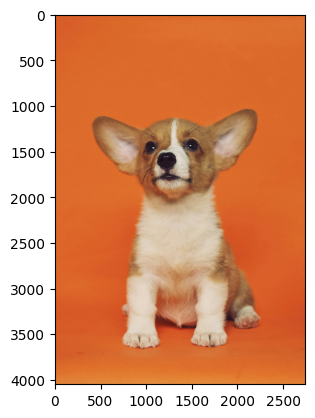

a plant


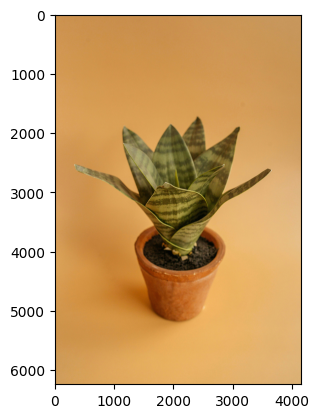

red mountains


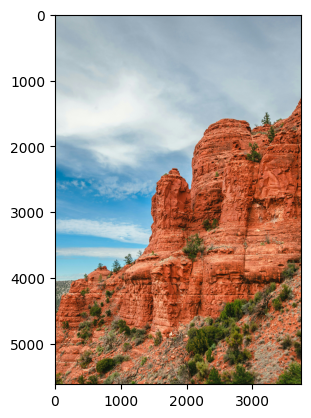

high mountains


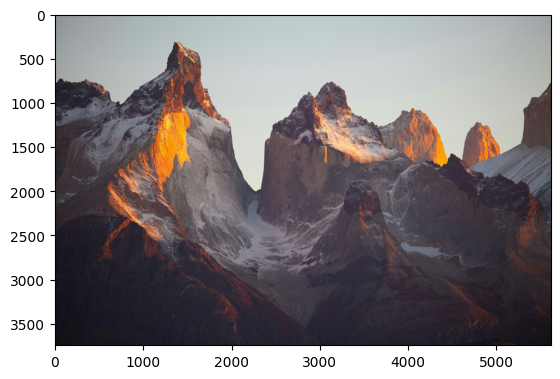

motorcycle


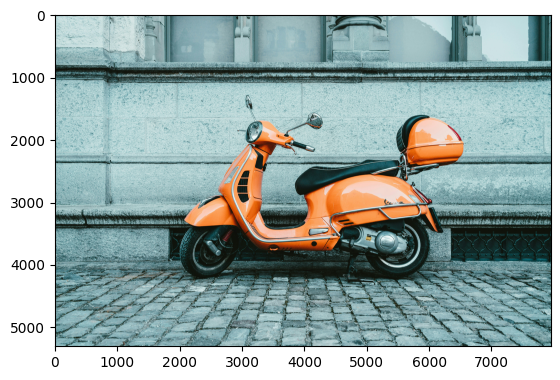

snowboarding


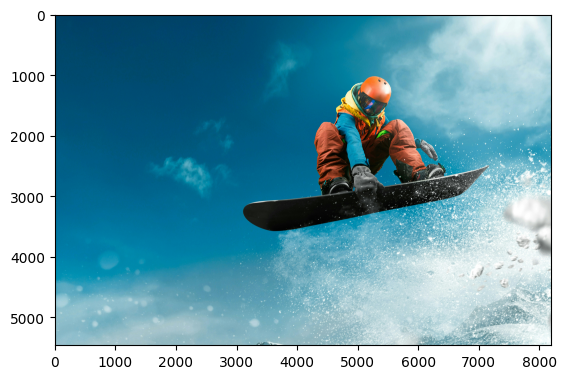

nice shoes


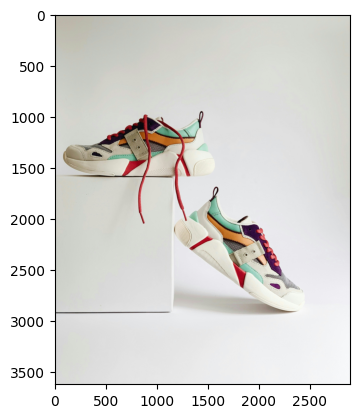

a white house


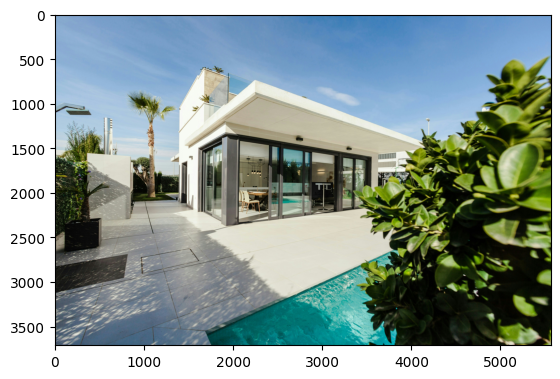

a puket bucket hat


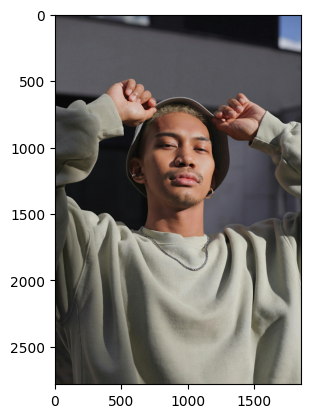

a dog running


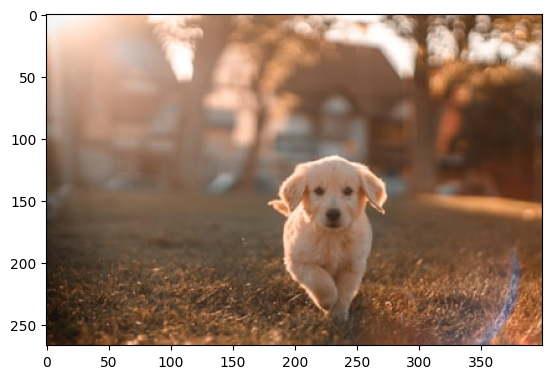

a group photo


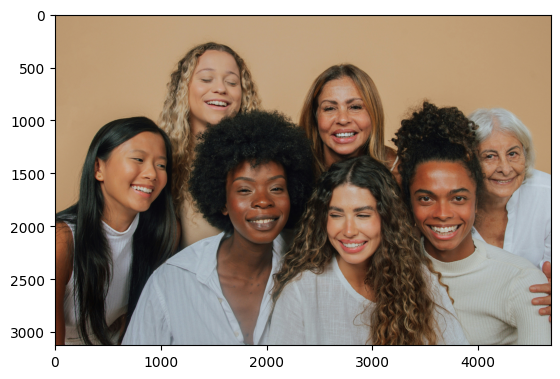

a dog hiding behind a tree


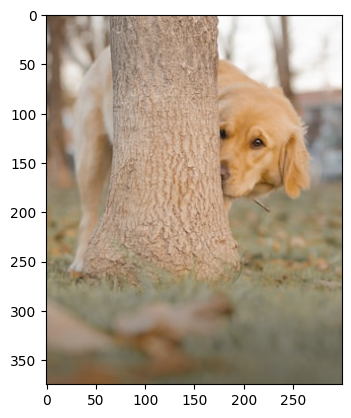

two dogs running


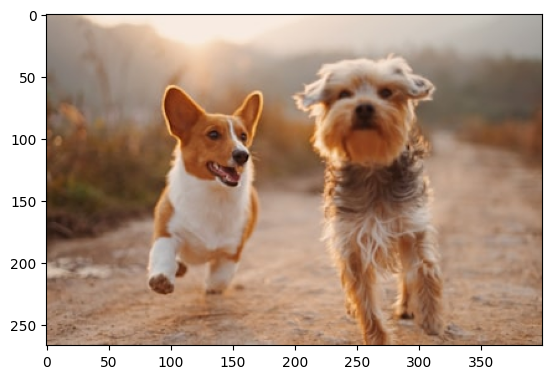

a smiley face


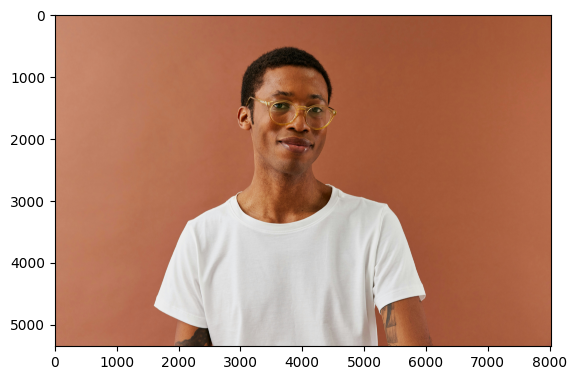

In [4]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

In [8]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

In [14]:
result = pipe(images[0:])
for res in result:
    print(res)

type(result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a small dog sitting on a orange background'}]
[{'generated_text': 'a small plant in a pot on a table'}]
[{'generated_text': 'a rocky mountain'}]
[{'generated_text': 'a group of mountains'}]
[{'generated_text': 'a scr scr scr scr scr scr scr scr scr'}]
[{'generated_text': 'a snowboarder in the air'}]
[{'generated_text': 'a pair of sneakers with colorful shoes on top'}]
[{'generated_text': 'a house with a pool and a large patio'}]
[{'generated_text': 'a man with a hat on his head'}]
[{'generated_text': 'a dog running in the grass'}]
[{'generated_text': 'a group of women smiling and posing for a picture'}]
[{'generated_text': 'a dog is standing behind a tree'}]
[{'generated_text': 'two dogs running on a dirt road'}]
[{'generated_text': 'a man with a tattoo on his arm'}]


list

In [22]:
list(result)

[[{'generated_text': 'a small dog sitting on a orange background'}],
 [{'generated_text': 'a small plant in a pot on a table'}],
 [{'generated_text': 'a rocky mountain'}],
 [{'generated_text': 'a group of mountains'}],
 [{'generated_text': 'a scr scr scr scr scr scr scr scr scr'}],
 [{'generated_text': 'a snowboarder in the air'}],
 [{'generated_text': 'a pair of sneakers with colorful shoes on top'}],
 [{'generated_text': 'a house with a pool and a large patio'}],
 [{'generated_text': 'a man with a hat on his head'}],
 [{'generated_text': 'a dog running in the grass'}],
 [{'generated_text': 'a group of women smiling and posing for a picture'}],
 [{'generated_text': 'a dog is standing behind a tree'}],
 [{'generated_text': 'two dogs running on a dirt road'}],
 [{'generated_text': 'a man with a tattoo on his arm'}]]

In [24]:
text_captions = [res['generated_text'] for res in result]

inputs = processor(
    text= text_captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

TypeError: list indices must be integers or slices, not str